## **Car Price Predication**

<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Internship Batch:20 </em></b>

## **Note:**
### **Part 1 Contains :**
 ***1. Data cleaning & preprocessing***
 
 ***2. EDA***
 
 ***3. Feature engineering***

### **Part 2 Contains Machine Learning Model Building**

- **Importing require library for performing EDA, Data Wrangling and data cleaning**

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
df= pd.read_excel('Final Used Car Scrap data .xlsx')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 10544
No. of Columns : 24


,Car Model,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price(Rs)
0,Honda City i VTEC SV,2014,Petrol,"18,600",1497,Manual,17.4,117.3,145@ 4600rpm,5,-,5 Speed,Power,Disc,Drum,"Tubeless,Radial",i VTEC Engine,4.0,No,No,4440,1695,1495,6.75 Lakh*
1,Jeep Compass 2.0 Limited Option,2017,Diesel,"15,000",1956,Manual,17.1,170,350@ 1750-2500rpm,5,-,6 Speed,Power,Disc,Discs,"Radial, Tubless",2.0-Litre 4-Cyl Multijet,4.0,Yes,No,4395,1818,1640,17.5 Lakh*
2,Chevrolet Tavera B2-7 seats BSIII,2008,Diesel,"1,15,000",2499,Manual,14.8,80,"19@ 1,800(kgm@ rpm)",7,-,5 Speed,Manual,Ventilated Disc,Drum,"Tubeless,Radial",In-Line Engine,4.0,Yes,No,4435,1680,1765,1.75 Lakh*
3,Honda City S,2008,Petrol,"80,000",1497,Manual,16.8,116.4,146@ 4800rpm,5,-,5 Speed,Power,Disc,Drum,"Tubeless,Radial",SOHC i-VTEC,4.0,No,No,4440,1695,1485,3.5 Lakh*
4,Hyundai i10 Sportz Option,2012,Petrol,"35,000",1197,Manual,20.36,78.9,111.8@ 4000rpm,5,-,5 Speed,Power,Ventilated Disc,Drum,"Tubeless,Radial",DOHC Kappa2 Engine,4.0,No,No,3585,1595,1550,3 Lakh*


In [4]:
# As we have 24 columns lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Make Year'], float64: ['No of Cylinder'], object: ['Car Model', 'Fuel Type', 'KMs driven', 'Engine Displacement(CC)', 'Transmission', 'Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)', 'Seating Capacity', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Volume', 'Engine Type', 'Turbo Charger', 'Super Charger', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price(Rs)']}

#### Observation:
- **This dataset contain 10544 rows and 24 columns.**
- **We have lot feature here with object datatypes which actually have to be integer type.**
- **Our target feature is Price.**

#### Feature engineering to convert feature in appropriate datatypes.

**1. Transfoming datatypes of KMs driven into int type.**

In [5]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.split(' ')[0])

In [6]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.replace(',',''))

In [7]:
df['KMs driven']=pd.to_numeric(df['KMs driven'])

In [8]:
df['KMs driven'].dtypes

dtype('int64')

**2. Transfoming datatypes of Engine Displacement(CC) into int type.**

In [9]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : x.replace('cc',''))

In [10]:
df['Engine Displacement(CC)'] = pd.to_numeric(df['Engine Displacement(CC)'])

In [11]:
df['Engine Displacement(CC)'].dtypes

dtype('int64')

**3. Transfoming datatypes of 'Milage(kmpl)' into float type.**

In [12]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('km/kg',''))

In [13]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('-',''))

In [14]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('km/hr',''))

In [15]:
df['Milage(kmpl)'] = pd.to_numeric(df['Milage(kmpl)'])

In [16]:
df['Milage(kmpl)'].dtypes

dtype('float64')

**4. Transfoming datatypes of Max Power into float type.**

In [17]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('-','')

In [18]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('null ','')

**Some of values in Max power are with unit PS, which need to convert into brake horse power.**

In [19]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('118PS at 6,600 rpm','116.3')

In [20]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('80 PS at 5200 rpm','78.9')

**Another error occur here, ValueError: Unable to parse string "55 Bhp" at position 6513**

In [21]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('55 Bhp','55')

**Another error occur here, ValueError: Unable to parse string "85ps" at position 6697**

In [22]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('85ps','83.8')

In [23]:
df['Max Power(bhp)'] = pd.to_numeric(df['Max Power(bhp)'])

In [24]:
df['Max Power(bhp)'].dtypes

dtype('float64')

**5. Transfoming datatypes of Torque into float type.**

In [25]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.split('@')[0])

In [26]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.rstrip('nm'))

**Some of values are in units kgm, which need to convert into Nm. For example, 13.9 kgm at 4200 rp**

In [27]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('13.9 kgm at 4200 rp','136.32')

In [28]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('-','')

In [29]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.rstrip('NM'))

**Another entry with 22.4 kgm at 1750-2750rp**

In [30]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('22.4 kgm at 1750-2750rp','219.66')

**Another error occur while converting datatype - ValueError: Unable to parse string "260  at 1800-2200 rp" at position 340**

In [31]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('260  at 1800-2200 rp','260')

In [32]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('180  at 1440-1500rp','180')

In [33]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('146 at 4800 rp','146')

In [34]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('90.3 at 4,200 rp','90.3')

**Another error here, ValueError: Unable to parse string "12.5kg" at position 1164**

In [35]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('12.5kg','122.58')

**Another error here, ValueError: Unable to parse string "11.4 kgm at 4,000 rp" at position 733**

In [36]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('11.4 kgm at 4,000 rp','111.79')

In [37]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.rstrip('at'))

In [38]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('153  at 3800 rp','153')

**Another error here, ValueError: Unable to parse string "24 KGM at 1900-2750 RP" at position 1391**

In [39]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('24 KGM at 1900-2750 RP','235.36')

In [40]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('190  at 1750 rp','190')

**Another error here,ValueError: Unable to parse string "13.1kg" at position 1620**

In [41]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('13.1kg','128.46')

In [42]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.split('at')[0])

In [43]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.rstrip('(11.2)'))

**Another error here, ValueError: Unable to parse string "11.3kg" at position 2269**

In [44]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('11.3kg','110.81')

In [45]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('210 / 1900','210')

In [54]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('6.1kg','59.82')

In [47]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('18.5kg-','181.42')

In [48]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('400  /2000 rp','400')

In [49]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('14.9 KGM ','146.12')

In [55]:
df['Torque(Nm)'] = pd.to_numeric(df['Torque(Nm)'])

In [56]:
df['Torque(Nm)'].dtypes

dtype('float64')

**6. Transfoming datatypes of Seating capacity into float type.**

In [57]:
df['Seating Capacity'] = df['Seating Capacity'].replace('-','')

In [58]:
df['Seating Capacity'] = pd.to_numeric(df['Seating Capacity'])

In [59]:
df['Seating Capacity'].dtypes

dtype('float64')

**8. Transfoming datatypes of Seating length into float type.**

In [60]:
df['Length(mm)'] = df['Length(mm)'].str.replace(',','')

In [61]:
df['Length(mm)'] = df['Length(mm)'].str.replace('-','')

In [62]:
df['Length(mm)'] = pd.to_numeric(df['Length(mm)'])

In [63]:
df['Length(mm)'].dtypes

dtype('float64')

**9. Transfoming datatypes of Seating Width(mm) into float type.**

In [64]:
df['Width(mm)'] = df['Width(mm)'].str.replace(',','')

In [65]:
df['Width(mm)'] = df['Width(mm)'].str.replace('-','')

In [66]:
df['Width(mm)'] = pd.to_numeric(df['Width(mm)'])

In [67]:
df['Width(mm)'].dtypes

dtype('float64')

**10. Transfoming datatypes of Seating Height(mm) into float type.**

In [68]:
df['Height(mm)'] = df['Height(mm)'].str.replace(',','')

In [69]:
df['Height(mm)'] = df['Height(mm)'].str.replace('-','')

In [70]:
df['Height(mm)'] = pd.to_numeric(df['Height(mm)'])

In [71]:
df['Height(mm)'].dtypes

dtype('float64')

**11. Transfoming datatypes of Price(Rs) into float type.**

In [72]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Lakh*','100000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Cr*','100000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace(',','')

In [73]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('*','')

In [74]:
df[['a','b']] = df['Price(Rs)'].str.split(expand=True)
df['a'] = df['a'].astype("float")
df['b'] = df['b'].astype("float")

In [75]:
df['b'] = df['b'].fillna(value = 1)
df["Price (Rs.)"] = df['a'] * df['b']

In [76]:
df.drop(columns=['Price(Rs)','a','b'], inplace = True)

**11. Feature Engineering on Make Year column to extract Age of Car**

In [77]:
df['Car_Age'] = 2021 - df['Make Year'] 

In [78]:
df.drop(columns=['Make Year'], inplace = True)

- **Feature Engineering on Car Model**

In [81]:
df['Car_Brand'] = df["Car Model"].str.split(' ').str[:2]
df['Car_Brand'] = df['Car_Brand'].apply(lambda x: ','.join(map(str, x)))
df['Car_Brand'] = df['Car_Brand'].str.replace(',',' ')
df['Car_Model'] = df["Car Model"].str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')

In [82]:
df.drop(columns = 'Car Model', inplace = True)

- **Let check datatypes after converting into appropriate datatypes.**

In [83]:
# As we have 24 columns lets sort columns by their datatype after conversion into appropriate datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['KMs driven', 'Engine Displacement(CC)', 'Car_Age'], float64: ['Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)', 'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)'], object: ['Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Volume', 'Engine Type', 'Turbo Charger', 'Super Charger', 'Car_Brand', 'Car_Model']}

### **Data Integrity Check**

In [84]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['KMs driven', 'Engine Displacement(CC)', 'Car_Age','Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)',
             'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)' ]

Categorical = [ 'Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 
               'Front Brake Type', 'Rear Brake Type', 'Tyre Volume', 'Engine Type', 'Turbo Charger', 
               'Super Charger', 'Car_Brand', 'Car_Model']

- **Dataset can contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.**

In [85]:
df.duplicated().sum() # This will detect duplicate entries in dataset

1658

- **Dropping duplicates entries from dataset.**

In [88]:
# Droping duplicate entries
df.drop_duplicates(keep='last', inplace =True)

In [89]:
df.shape

(8886, 25)

#### Check for presense of any whitespaces, '?',  'NA',  '-', 'null' in dataset

In [90]:
df.isin(['????','?????','-','null','NA',' ']).sum().any()

True

In [91]:
df.replace('-',np.nan, inplace = True)
df.replace('null',np.nan, inplace= True)
df.replace('????', np.nan, inplace = True)
df.replace('?????', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)

In [92]:
df.to_excel('clean data phase1.xlsx',index =False)

In [125]:
df = pd.read_excel('clean data phase1.xlsx')

In [126]:
df.isnull().sum()

Fuel Type                    26
KMs driven                    0
Engine Displacement(CC)       0
Transmission                  0
Milage(kmpl)                 27
Max Power(bhp)              121
Torque(Nm)                  145
Seating Capacity            487
Color                      1860
Gear Box                    128
Steering Type               453
Front Brake Type            483
Rear Brake Type             437
Tyre Volume                 350
Engine Type                 378
No of Cylinder              403
Turbo Charger               266
Super Charger               373
Length(mm)                  176
Width(mm)                   173
Height(mm)                  172
Price (Rs.)                   0
Car_Age                       0
Car_Brand                     0
Car_Model                  1660
dtype: int64

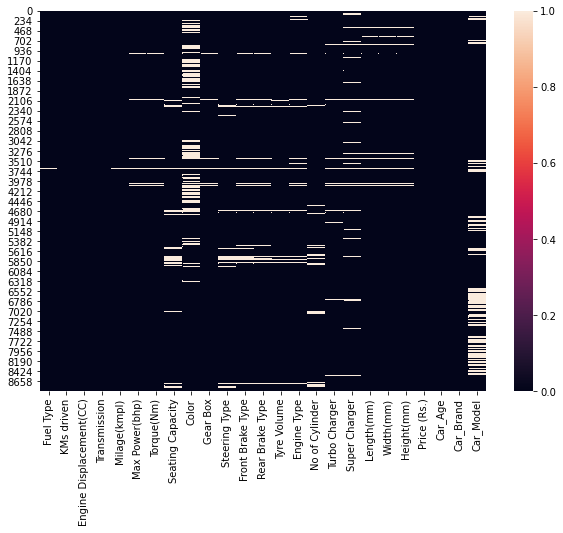

In [127]:
sns.set_palette('cool_r')
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()

**Before Going for imputation of missing values,**

**Let first Enlist different subcategories in categorical variable inorder to check presense of similar or repeated category with different sub category name.**

In [128]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Fuel Type
Petrol      4767
Diesel      3981
CNG           67
LPG           41
Electric       4
Name: Fuel Type, dtype: int64
Transmission
Manual       7457
Automatic    1429
Name: Transmission, dtype: int64
Color
White                          1943
Other                          1199
Silver                         1052
Grey                            870
Red                             541
Blue                            336
Black                           272
Brown                           172
Maroon                           72
Golden                           69
Orange                           56
Green                            25
SILKY SILVER                     23
Gold                             22
Star Dust                        13
Purple                           11
Others                           11
Yellow                            9
Silky silver                      9
Superior white                    8
Beige                             7
Gray                           

**1. Value counts and Sub-category Check For 'Super Charger'**

In [129]:
df['Super Charger'].value_counts()

No     8497
Yes      12
NO        4
Name: Super Charger, dtype: int64

**There is correction in subcategories of Super Charger.**

In [130]:
df['Super Charger'].replace('NO','No',inplace= True)

In [131]:
df['Super Charger'].value_counts()

No     8501
Yes      12
Name: Super Charger, dtype: int64

**2. Value counts and Sub-category Check For 'Turbo Charger'**

In [132]:
df['Turbo Charger'].value_counts()

No      5034
Yes     3570
no         6
YES        5
Twin       3
yes        2
Name: Turbo Charger, dtype: int64

In [133]:
df['Turbo Charger'].replace('no','No', inplace= True)
df['Turbo Charger'].replace('YES','Yes', inplace= True)
df['Turbo Charger'].replace('yes','Yes', inplace= True)

In [134]:
df['Turbo Charger'].value_counts()

No      5040
Yes     3577
Twin       3
Name: Turbo Charger, dtype: int64

**3. Value counts and Sub-category Check For 'Front Brake Type'.**

In [135]:
df['Front Brake Type'].value_counts()

Disc                                        4575
Ventilated Disc                             3288
Solid Disc                                   188
Ventilated Discs                              94
Disc & Caliper Type                           54
Ventilated DIsc                               49
Disk                                          37
Drum                                          22
Ventilated Disk                               20
Disc, 236 mm                                  13
Ventilated discs                              13
Vantilated Disc                               12
Ventlated Disc                                 9
Ventillated Disc                               5
Vacuum assisted hydraulic dual circuit w       4
Ventillated Discs                              3
disc                                           3
264mm Ventilated discs                         3
Booster assisted ventilated disc               3
Multilateral Disc                              1
Tandem master cylind

Correction in subcategories

In [136]:
df['Front Brake Type'].replace('Ventilated Discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated DIsc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Disk','Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated Disk','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Disc, 236 mm','Disc (236 mm)', inplace = True)
df['Front Brake Type'].replace('Vantilated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventlated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventillated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventillated Discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('264mm Ventilated discs','Ventilated Disc (264mm)', inplace = True)
df['Front Brake Type'].replace('disc','Disc', inplace = True)
df['Front Brake Type'].replace('260mm discs','Disc (260mm)', inplace = True)
df['Front Brake Type'].replace('Disc brakes','Disc', inplace = True)
df['Front Brake Type'].replace('Discs','Disc', inplace = True)
df['Front Brake Type'].replace('Disc,internally ventilated','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated disc','Ventilated Disc', inplace = True)

In [137]:
df['Front Brake Type'].value_counts()

Disc                                        4617
Ventilated Disc                             3495
Solid Disc                                   188
Disc & Caliper Type                           54
Drum                                          22
Disc (236 mm)                                 13
Vacuum assisted hydraulic dual circuit w       4
Ventilated Disc (264mm)                        3
Booster assisted ventilated disc               3
Multilateral Disc                              1
Tandem master cylinder with Servo assist       1
Single Piston Sliding Caliper, Vented Di       1
Disc (260mm)                                   1
Name: Front Brake Type, dtype: int64

**4. Value counts and Sub-category Check For 'Rear Brake Type'.**

In [138]:
df['Rear Brake Type'].value_counts()

Drum                                        7269
Disc                                         671
Ventilated Disc                              105
Solid Disc                                    85
Disc & Caliper Type                           54
Leading-Trailing Drum                         53
Self-Adjusting Drum                           51
Discs                                         31
Drums                                         22
Ventilated Discs                              18
Disc & Drum                                   16
Drums 180 mm                                  13
Self Adjusting Drums                          10
Ventilated discs                               8
Self Adjusting Drum                            7
Self adjusting drums                           5
Vacuum assisted hydraulic dual circuit w       4
262mm Disc & Drum Combination                  3
Drum in disc                                   3
self adjusting drums                           3
Leading & Trailing D

Correction In Sub Categories

In [139]:
df['Rear Brake Type'].replace('Discs','Disc',inplace= True)
df['Rear Brake Type'].replace('Drums','Drum',inplace= True)
df['Rear Brake Type'].replace('Ventilated Discs','Ventilated Disc',inplace= True)
df['Rear Brake Type'].replace('Self Adjusting Drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self Adjusting Drum','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self adjusting drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self adjusting Drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Ventilated discs','Ventilated Disc',inplace= True)
df['Rear Brake Type'].replace('Drum in disc','Disc & Drum',inplace= True)
df['Rear Brake Type'].replace('self adjusting drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('drum','Drum',inplace= True)
df['Rear Brake Type'].replace('203mm Drums','Drum (203mm)',inplace= True)
df['Rear Brake Type'].replace('228.6 mm dia, drums on rear wheels','Drum (228.6 mm)',inplace= True)
df['Rear Brake Type'].replace('Drum in Discs','Disc & Drum',inplace= True)

In [140]:
df['Rear Brake Type'].value_counts()

Drum                                        7294
Disc                                         702
Ventilated Disc                              131
Solid Disc                                    85
Self-Adjusting Drum                           79
Disc & Caliper Type                           54
Leading-Trailing Drum                         53
Disc & Drum                                   20
Drums 180 mm                                  13
Vacuum assisted hydraulic dual circuit w       4
262mm Disc & Drum Combination                  3
Booster assisted drum                          3
Leading & Trailing Drum                        3
Ventilated Drum                                2
Drum (228.6 mm)                                1
Single Piston Sliding Caliper, Vented Di       1
Drum (203mm)                                   1
Name: Rear Brake Type, dtype: int64

**5. Value counts and Sub-category Check For 'Steering Type'.**

In [141]:
df['Steering Type'].value_counts()

Power         7605
Electric       472
Manual         230
Electrical      80
EPAS            22
Electronic      14
Hydraulic        6
power            4
Name: Steering Type, dtype: int64

In [142]:
df['Steering Type'].replace('power','Power', inplace =True)
df['Steering Type'].replace('Electrical','Electric', inplace =True)

In [143]:
df['Steering Type'].value_counts()

Power         7609
Electric       552
Manual         230
EPAS            22
Electronic      14
Hydraulic        6
Name: Steering Type, dtype: int64

**6. Value counts and Sub-category Check For 'Gear Box'.**

In [144]:
pd.set_option('display.max_rows',None)
df['Gear Box'].value_counts()

5 Speed                                    6324
6 Speed                                    1005
5                                           205
5-Speed                                     205
4 Speed                                     202
8 Speed                                     179
7 Speed                                     174
6-Speed                                      58
5 speed                                      58
9 Speed                                      50
CVT                                          47
4-Speed                                      38
7-Speed S-Tronic                             16
7-Speed DCT                                  11
7 Speed CVT                                  11
Five Speed Manual Transmission               11
7-Speed                                      11
5 Speed CVT                                  11
7 Speed DSG                                   8
5 Speed AT+ Paddle Shifters                   8
8-Speed                                 

In [145]:
df['Gear Box'].replace('5','5 Speed',inplace= True)
df['Gear Box'].replace('5-Speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Gears','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed Manual Transmission','5 Speed',inplace= True)
df['Gear Box'].replace('5-speed','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed ','5 Speed',inplace= True)
df['Gear Box'].replace('6-Speed','6 Speed',inplace= True)
df['Gear Box'].replace('5 GearBox','5 Speed',inplace= True)
df['Gear Box'].replace('6','6 Speed',inplace= True)
df['Gear Box'].replace('7-Speed','7 Speed',inplace= True)
df['Gear Box'].replace('7-speed Stronic','7 Speed S tronic',inplace= True)
df['Gear Box'].replace('7 Speed S tronic','7 Speed',inplace= True)

In [146]:
df['Gear Box'].replace('5 speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Manual','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual Transmission','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed Manual Transmission Gearbox','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual (Cable Type Gear Shift)','5 Speed',inplace= True)

In [147]:
df['Gear Box'].replace('4-Speed','4 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DCT','7 Speed DCT',inplace= True)
df['Gear Box'].replace('7G DCT 7-Speed Dual Clutch Transmission','7 Speed DCT',inplace= True)
df['Gear Box'].replace('7 Speed 7G-DCT','7 Speed DCT',inplace= True)
df['Gear Box'].replace('7-Speed DSG','7 Speed DSG',inplace= True)
df['Gear Box'].replace('Six Speed Manual with Paddle Shifter','6 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DSG','7 Speed DSG',inplace= True)
df['Gear Box'].replace('6-speed DCT','6 Speed DCT',inplace= True)
df['Gear Box'].replace('6 Speed MT','6 Speed',inplace= True)
df['Gear Box'].replace('6-Speed DCT','6 Speed DCT',inplace= True)
df['Gear Box'].replace('8-Speed','8 Speed',inplace= True)
df['Gear Box'].replace('8-Speed DCT','8 Speed DCT',inplace= True)

In [148]:
df['Gear Box'].replace('6 speed','6 Speed',inplace= True)
df['Gear Box'].replace('6-Speed IMT','6 Speed iMT',inplace= True)
df['Gear Box'].replace('6 Speed Automatic','6 Speed AT',inplace= True)
df['Gear Box'].replace('6-speed','6 Speed',inplace= True)
df['Gear Box'].replace('Six Speed Gearbox','6 Speed',inplace= True)
df['Gear Box'].replace('9 speed Tronic','9 Speed Tronic',inplace= True)

In [149]:
df['Gear Box'].replace('5 Speed AT+ Paddle Shifters','5 Speed',inplace= True)
df['Gear Box'].replace('8-Speed Steptronic','8 Speed Steptronic',inplace= True)

In [150]:
df['Gear Box'].replace('Automatic Transmission','Fully Automatic',inplace= True)
df['Gear Box'].replace('AGS','Auto Shift Gear',inplace= True)
df['Gear Box'].replace('9G-TRONIC','9 Speed Tronic',inplace= True)

In [151]:
df['Gear Box'].value_counts()

5 Speed                 6846
6 Speed                 1078
4 Speed                  240
7 Speed                  190
8 Speed                  187
9 Speed                   50
CVT                       47
7 Speed DCT               27
7-Speed S-Tronic          16
5 Speed CVT               11
7 Speed CVT               11
7 Speed DSG                9
8 Speed Sport              6
9 Speed Tronic             6
8 Speed Tiptronic          4
6-Speed IVT                4
Fully Automatic            4
6 Speed DCT                4
8 Speed Steptronic         3
6 Speed AT                 3
6-speed AutoSHIFT          3
6 Speed iMT                3
10 speed                   2
8 Speed Tip Tronic S       2
8 Speed DCT                1
Auto Shift Gear            1
Name: Gear Box, dtype: int64

**7. Value counts and Sub-category Check For 'Tyre Volume'.**

In [123]:
df['Tyre Volume'].value_counts()

Tubeless,Radial           5379
Tubeless                  1530
Tubeless Tyres             603
Tubeless, Radial           601
Radial                     125
Tubeless Tyres, Radial      91
Tubeless,Radials            37
Tubeless Radial Tyres       31
Radial, Tubless             29
Tubless, Radial             29
Radial Tubeless             18
Runflat                     13
Tubless,Radial              13
Tubeless Radial              6
Runflat Tyre                 5
Radial,Tubeless              5
tubeless tyre                4
Runflat Tyres                4
Run-Flat                     3
Radial Tyres                 3
Tubeless Radial Tyre         2
Tubeless,Runflat             1
Tubless Radial Tyrees        1
Tubeless Radials             1
Tubeless, Runflat            1
Radial, Tubeless             1
Name: Tyre Volume, dtype: int64

In [152]:
df['Tyre Volume'].replace('Tubeless,Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Tyres','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless, Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Tyres, Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless,Radials','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Radial Tyres','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial, Tubless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubless, Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial Tubeless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial,Tubeless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('tubeless tyre','Tubeless',inplace =True)
df['Tyre Volume'].replace('Tubeless Radials','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubless Radial Tyrees','Tubeless Radial Tyre',inplace =True)

In [153]:
df['Tyre Volume'].replace('Tubless,Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial, Tubeless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Runflat','Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Runflat Tyres','Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Run-Flat','Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless,Runflat','Tubeless Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless, Runflat','Tubeless Runflat Tyre',inplace =True)

## Missing value Imputation 
- **Numerical value can be imputate with Mean and Median. We can decide imputation method based on boxplot & Distplot.** 
- **Categorical variable & ordinal variable can be imputate with mode.**

In [156]:
df.isnull().sum()

Fuel Type                    26
KMs driven                    0
Engine Displacement(CC)       0
Transmission                  0
Milage(kmpl)                 27
Max Power(bhp)              121
Torque(Nm)                  145
Seating Capacity            487
Color                      1860
Gear Box                    128
Steering Type               453
Front Brake Type            483
Rear Brake Type             437
Tyre Volume                 350
Engine Type                 378
No of Cylinder              403
Turbo Charger               266
Super Charger               373
Length(mm)                  176
Width(mm)                   173
Height(mm)                  172
Price (Rs.)                   0
Car_Age                       0
Car_Brand                     0
Car_Model                  1660
dtype: int64

In [157]:
# Imputation of Categorical variable or ordinal variable with mode of category
df['Fuel Type'].fillna(df['Fuel Type'].mode()[0],inplace = True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0],inplace = True)
df['Color'].fillna(df['Color'].mode()[0],inplace = True)
df['Gear Box'].fillna(df['Gear Box'].mode()[0],inplace = True)
df['Steering Type'].fillna(df['Steering Type'].mode()[0],inplace = True)
df['Front Brake Type'].fillna(df['Front Brake Type'].mode()[0],inplace = True)
df['Rear Brake Type'].fillna(df['Rear Brake Type'].mode()[0],inplace = True)
df['Color'].fillna(df['Color'].mode()[0],inplace = True)
df['Tyre Volume'].fillna(df['Tyre Volume'].mode()[0],inplace = True)
df['Engine Type'].fillna(df['Engine Type'].mode()[0],inplace = True)
df['No of Cylinder'].fillna(df['No of Cylinder'].mode()[0],inplace = True)
df['Turbo Charger'].fillna(df['Turbo Charger'].mode()[0],inplace = True)
df['Super Charger'].fillna(df['Super Charger'].mode()[0],inplace = True)

In [178]:
df['Car_Model'].fillna('Unknown',inplace = True)

#### **1.Impuatation of Missing values in Milage**

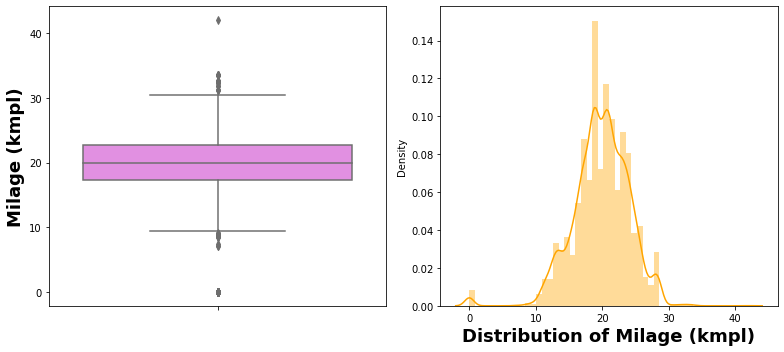

In [158]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
sns.boxplot(y='Milage(kmpl)', data= df, color = 'violet')
plt.ylabel('Milage (kmpl)',fontweight = 'bold',fontsize= 18)
plt.subplot(1,2,2)
sns.distplot(df['Milage(kmpl)'], color ='Orange')
plt.xlabel('Distribution of Milage (kmpl)',fontweight = 'bold',fontsize= 18)
plt.tight_layout()
plt.show()

In [159]:
print("Mean of Milage(kmpl):",df['Milage(kmpl)'].mean(),'kmpl')
print("Median of Milage(kmpl):",df['Milage(kmpl)'].median(),'kmpl')

Mean of Milage(kmpl): 19.82472965345972 kmpl
Median of Milage(kmpl): 20.0 kmpl


**Milage (kmpl) is almost symmetrical in nature. Outliers are also spread to both lower & upper bound.**

**So, We will be imputate Milage (kmpl) with mean.**

In [160]:
df['Milage(kmpl)'].fillna(df['Milage(kmpl)'].mean(), inplace =True)

#### **2. Imputation of missing values in Max Power**

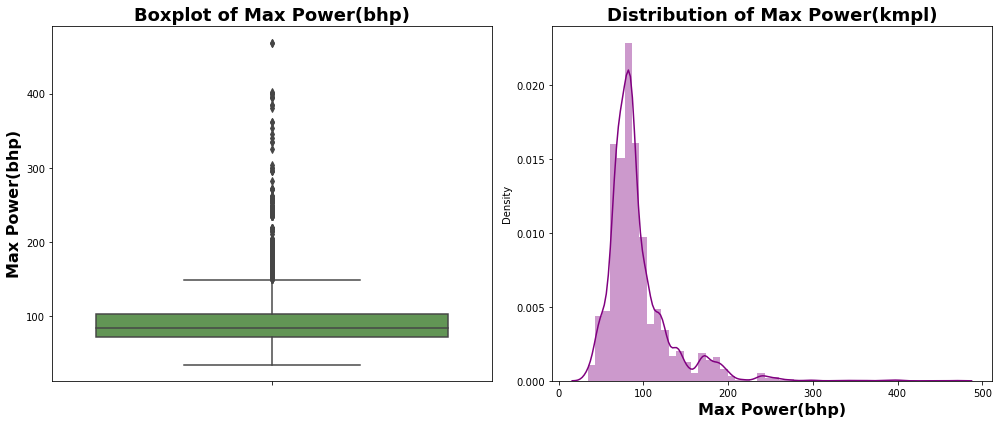

In [161]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Max Power(bhp)'], palette='gist_earth_r')
plt.title('Boxplot of Max Power(bhp)',fontweight ='bold', fontsize = 18)
plt.ylabel('Max Power(bhp)', fontweight ='bold', fontsize = 16 )
plt.subplot(1,2,2)
sns.distplot( x = df['Max Power(bhp)'],color ='Purple' )
plt.title('Distribution of Max Power(kmpl)',fontweight ='bold', fontsize = 18)
plt.xlabel('Max Power(bhp)',fontweight ='bold', fontsize = 16)
plt.tight_layout()
plt.show()

In [162]:
print("Mean of Max Power:",df['Max Power(bhp)'].mean(),'bhp')
print("Median of Max Power:",df['Max Power(bhp)'].median(),'bhp')

Mean of Max Power: 92.73147233314377 bhp
Median of Max Power: 83.1 bhp


**1. Distribution of Max Power is right Skewed and from boxplot we can see presence of outliers.**

**2. Mean is greater than median.**

**We gone imputate Max Power with Median as it is less sensitive to outliers.**

In [163]:
df['Max Power(bhp)'].fillna(df['Max Power(bhp)'].median(), inplace = True)

#### **3. Imputation of missing values in Torque**

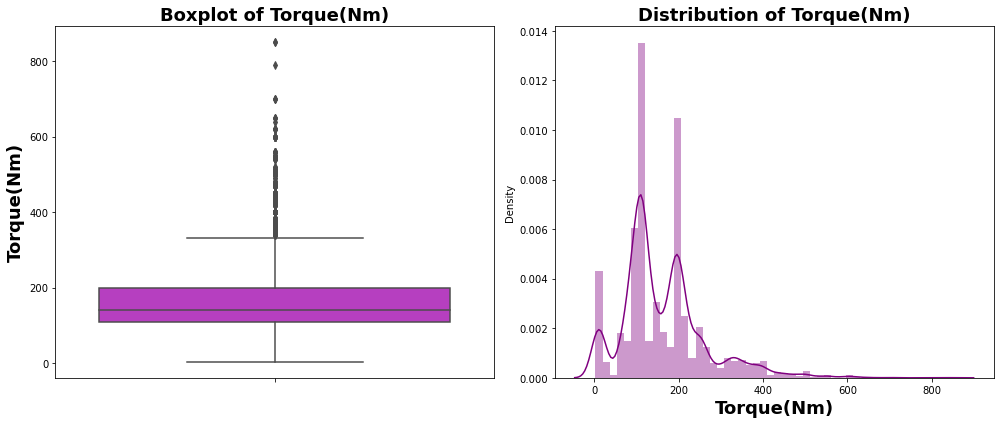

In [164]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Torque(Nm)'], palette='gnuplot2')
plt.title('Boxplot of Torque(Nm)',fontweight ='bold', fontsize = 18)
plt.ylabel('Torque(Nm)', fontweight ='bold', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Torque(Nm)'],color ='Purple' )
plt.title('Distribution of Torque(Nm)',fontweight ='bold', fontsize = 18)
plt.xlabel('Torque(Nm)',fontweight ='bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [165]:
print("Mean of Torque(Nm):",df['Torque(Nm)'].mean(),'Nm')
print("Median of Torque(Nm):",df['Torque(Nm)'].median(),'Nm')

Mean of Torque(Nm): 162.3707607825189 Nm
Median of Torque(Nm): 140.0 Nm


**1. Outliers are present in upper bound of Torque(Nm)**

**2. Torque is right skewed in nature.**

**We gone imputate Torque with Median as it is less sensitive to outliers.**

In [166]:
df['Torque(Nm)'].fillna(df['Torque(Nm)'].median(), inplace =True)

#### **4. Imputation of missing values in Length(mm)**

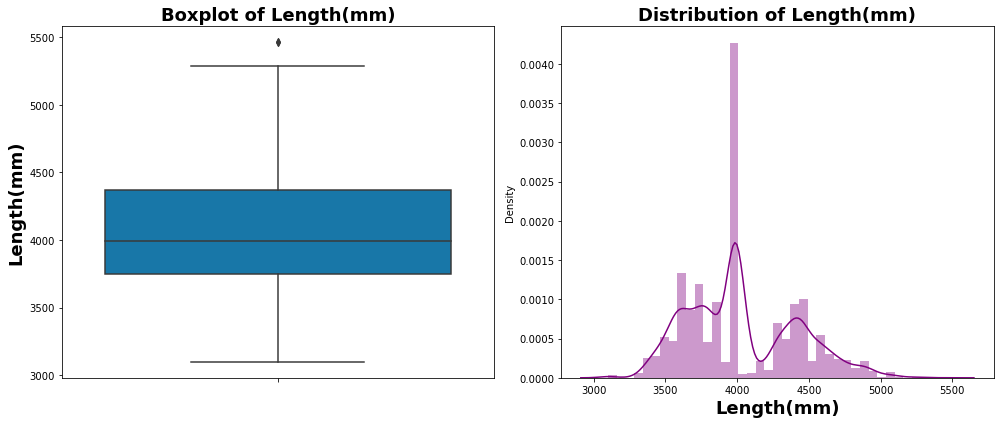

In [167]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Length(mm)'], palette='winter_r')
plt.title('Boxplot of Length(mm)',fontweight ='bold', fontsize = 18)
plt.ylabel('Length(mm)', fontweight ='bold', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Length(mm)'],color ='Purple' )
plt.title('Distribution of Length(mm)',fontweight ='bold', fontsize = 18)
plt.xlabel('Length(mm)',fontweight ='bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [168]:
print("Mean of Length(mm):",df['Length(mm)'].mean(),'mm')
print("Median of Length(mm):",df['Length(mm)'].median(),'mm')

Mean of Length(mm): 4028.7541905855337 mm
Median of Length(mm): 3995.0 mm


**We gone imputate length with mean as almost no outliers present.**

In [169]:
df['Length(mm)'].fillna(df['Length(mm)'].mean(), inplace = True)

#### **5. Imputation of missing values in Width(mm)**

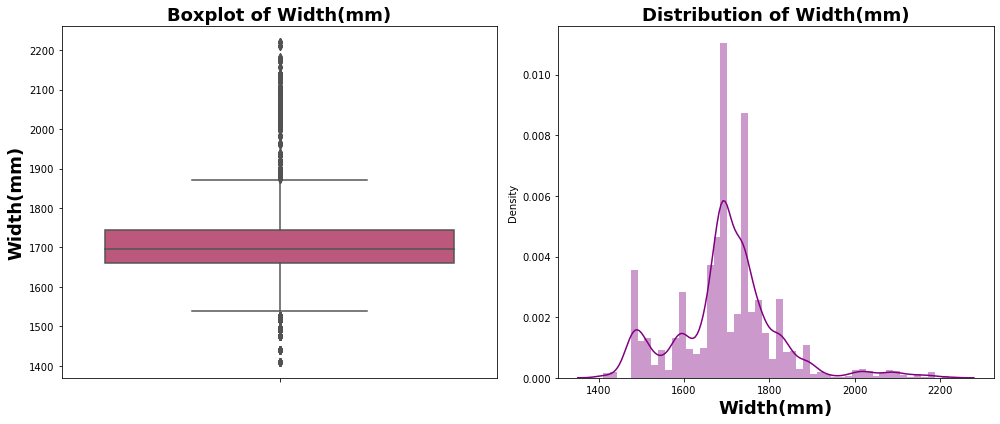

In [170]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Width(mm)'], palette='plasma')
plt.title('Boxplot of Width(mm)',fontweight ='bold', fontsize = 18)
plt.ylabel('Width(mm)', fontweight ='bold', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Width(mm)'],color ='Purple' )
plt.title('Distribution of Width(mm)',fontweight ='bold', fontsize = 18)
plt.xlabel('Width(mm)',fontweight ='bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [171]:
print("Mean of Width(mm):",df['Width(mm)'].mean(),'mm')
print("Median of Width(mm):",df['Width(mm)'].median(),'mm')

Mean of Width(mm): 1701.6738207276483 mm
Median of Width(mm): 1695.0 mm


**Outliers are present in width, as mean is sensitive to outliers we gone imputate outliers with Median.**

In [172]:
df['Width(mm)'].fillna(df['Width(mm)'].mean(), inplace = True)

#### **6. Imputation of missing values in Height (mm)**

In [173]:
df.drop(df[df['Height(mm)']>5000].index, inplace =True)

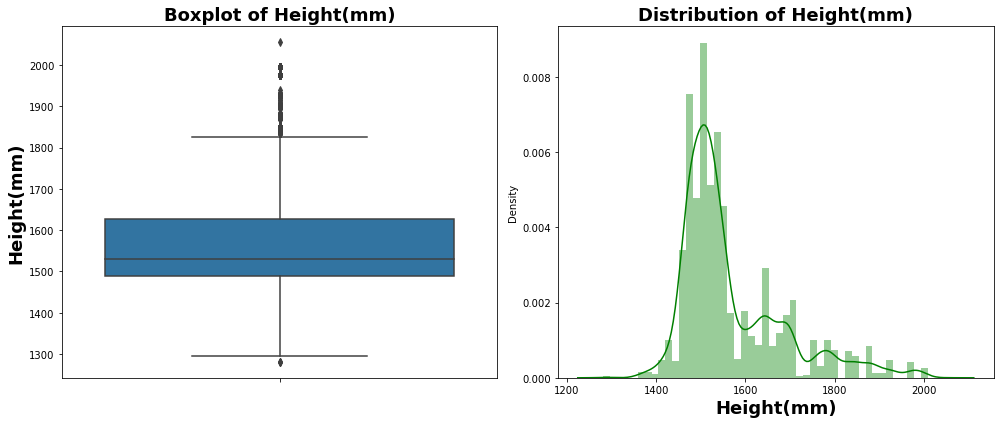

In [174]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Height(mm)'], palette='tab10')
plt.title('Boxplot of Height(mm)',fontweight ='bold', fontsize = 18)
plt.ylabel('Height(mm)', fontweight ='bold', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Height(mm)'],color ='Green' )
plt.title('Distribution of Height(mm)',fontweight ='bold', fontsize = 18)
plt.xlabel('Height(mm)',fontweight ='bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [175]:
print("Mean of Height(mm):",df['Height(mm)'].mean(),'mm')
print("Median of Height(mm):",df['Height(mm)'].median(),'mm')

Mean of Height(mm): 1567.6982323232323 mm
Median of Height(mm): 1530.0 mm


**1. Outliers are present in upper bound of Height(mm)**

**2. Height is right skewed in nature.**

**3. Mean is greater than median.**

**We gone imputate Height with Median as it is less sensitive to outliers.**

In [176]:
df['Height(mm)'].fillna(df['Height(mm)'].median(),inplace=True)

### **Missing Value check after imputation**

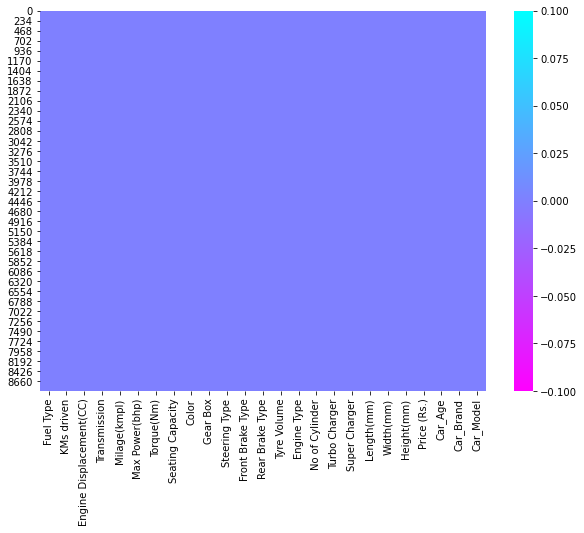

In [179]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

In [180]:
# Importing Final Clean data in excel file
df.to_excel('Car_used_price_Clean.xlsx', index = False)

**Importing Final clean data Excel file**

In [2]:
df = pd.read_excel('Car_used_price_Clean.xlsx')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
0,Petrol,18600,1497,Manual,17.40,117.3,145.0,5,White,5 Speed,Power,Disc,Drum,Tubeless Radial Tyre,i VTEC Engine,4,No,No,4440.0,1695.0,1495,675000.0,7,Honda City,i VTEC SV
1,Diesel,15000,1956,Manual,17.10,170.0,350.0,5,White,6 Speed,Power,Disc,Disc,Tubeless Radial Tyre,2.0-Litre 4-Cyl Multijet,4,Yes,No,4395.0,1818.0,1640,1750000.0,4,Jeep Compass,2.0 Limited Option
2,Diesel,115000,2499,Manual,14.80,80.0,19.0,7,White,5 Speed,Manual,Ventilated Disc,Drum,Tubeless Radial Tyre,In-Line Engine,4,Yes,No,4435.0,1680.0,1765,175000.0,13,Chevrolet Tavera,B2-7 seats BSIII
3,Petrol,80000,1497,Manual,16.80,116.4,146.0,5,White,5 Speed,Power,Disc,Drum,Tubeless Radial Tyre,SOHC i-VTEC,4,No,No,4440.0,1695.0,1485,350000.0,13,Honda City,S
4,Petrol,35000,1197,Manual,20.36,78.9,111.8,5,White,5 Speed,Power,Ventilated Disc,Drum,Tubeless Radial Tyre,DOHC Kappa2 Engine,4,No,No,3585.0,1595.0,1550,300000.0,9,Hyundai i10,Sportz Option


## Statistical Matrix

In [84]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
KMs driven,8884.000000,66460.392954,48663.642255,201.000000,37000.000000,61873.000000,88522.000000,2070500.000000
Engine Displacement(CC),8884.000000,1391.822490,467.384613,0.000000,1197.000000,1248.000000,1498.000000,5935.000000
Milage(kmpl),8884.000000,19.823632,4.197076,0.000000,17.400000,20.000000,22.702500,42.000000
Max Power(bhp),8884.000000,92.599130,37.438784,34.200000,73.000000,83.100000,100.600000,469.000000
Torque(Nm),8884.000000,161.997166,99.817097,3.000000,109.000000,140.000000,200.000000,850.000000
No of Cylinder,8884.000000,3.792098,0.511602,0.000000,4.000000,4.000000,4.000000,8.000000
Length(mm),8884.000000,4028.761789,381.821466,3099.000000,3746.000000,3995.000000,4331.000000,5462.000000
Width(mm),8884.000000,1701.675323,120.047417,1410.000000,1660.000000,1695.000000,1745.000000,2220.000000
Height(mm),8884.000000,1566.968370,115.762687,1281.000000,1490.000000,1530.000000,1620.000000,2055.000000
Price (Rs.),8884.000000,634944.644079,771983.056555,35000.000000,300000.000000,450000.000000,650000.000000,9500000.000000


### Observation :
1. All Numerical value except Milage(kmpl) have value of mean greater than median.
    
2. **If we look at minimum value column, clearly there exist error in columns like Engine Displacement(CC), Milage(kmpl), Seating Capacity, No of Cylinder as there minimum value cannot be zero.**
    
3. Some of Columns contain outliers as seen by comparison of 75% column & max column.
4. **Average Used car price is 6.34 lakh while maximum price is 95 lakh.**

In [185]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,Fuel Type,Transmission,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,Turbo Charger,Super Charger,Car_Brand,Car_Model
count,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884
unique,5,2,198,26,6,13,17,5,338,3,2,225,1759
top,Petrol,Manual,White,5 Speed,Power,Disc,Drum,Tubeless Radial Tyre,In-Line Engine,No,No,Maruti Swift,Unknown
freq,4793,7455,3802,6972,8061,5098,7729,7320,1211,5306,8872,956,1660


### Observation :
1. Most of car used Tubeless radial tyre compare to ran-flat tyre which are costly compare to earlier.
2. Majority of car are 5 seater with 5 speed gearbox having power steering facility. **We can conclude that most of used car low price range small car and there are very few SUV category car.**
3. **Most prefer color is white with mannual transmission.**
4. Very few car contain Super Charger while majority of do not contain Turbo charger.

# EDA 

### Exploring Fuel Type

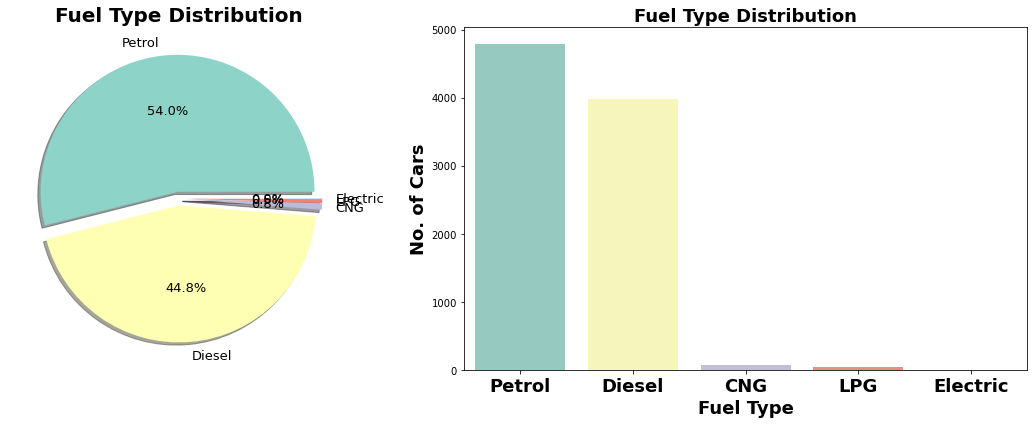

In [234]:
# Counting Fuel type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set3')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Fuel Type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Fuel Type',data=df,ax=ax[1])
ax[1].set_title('Fuel Type Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Fuel Type",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()

- **Plot of Fuel Type Vs Price**

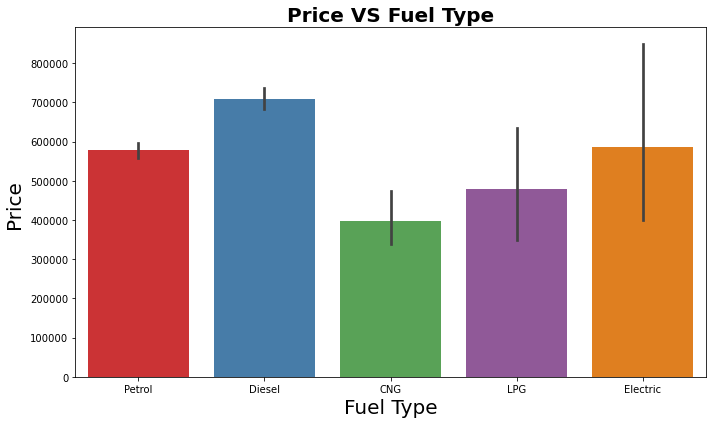

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(10,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Fuel Type'])
plt.title("Price VS Fuel Type",fontsize=20,fontweight ='bold')
plt.xlabel('Fuel Type',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of car are Petrol operated followed by Diesel. This may be due to low prices of Petrol car compare to diesel car.**
- **Very small segment of electric car and also price is quite high compare to petrol based.**
- **CNG based car are Cheapest compare to others.**

### Exploring Steering Type

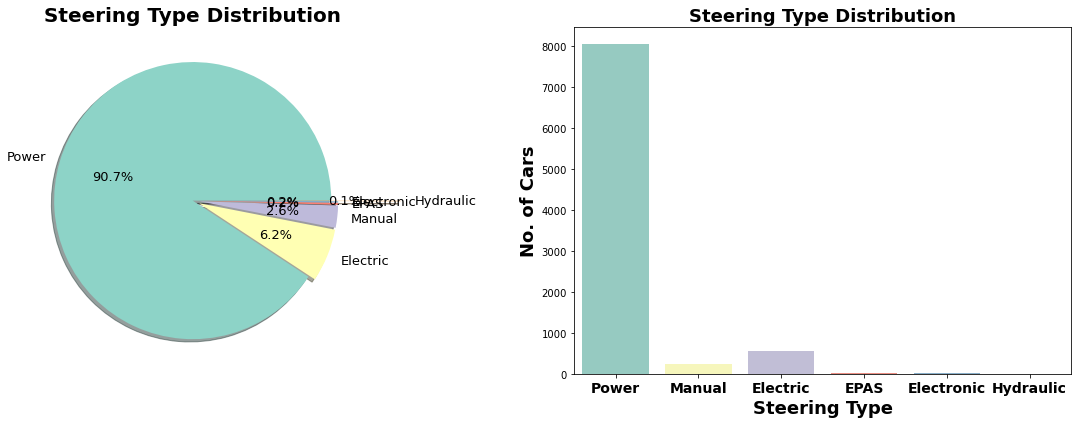

In [236]:
# Exploring Steering Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set3')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Steering Type'].value_counts().plot.pie(explode=[0.0,0.05,0.05,0.05,0.05,0.5],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Steering Type Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Steering Type',data=df,ax=ax[1])
ax[1].set_title('Steering Type Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Steering Type",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

- **Price Vs Steering Type**

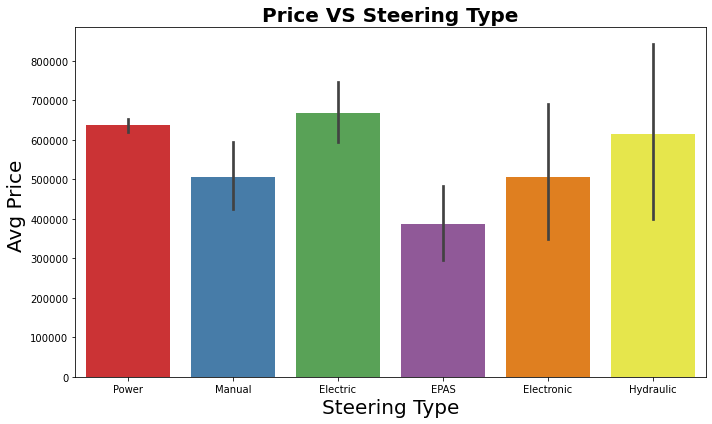

In [73]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(10,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Steering Type'])
plt.title("Price VS Steering Type",fontsize=20,fontweight ='bold')
plt.xlabel('Steering Type',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **More than 90 % of car users perfer Power steering compare to others.**
- **6.2% car based on electric steering, which is costly compare to others.**
- **Very small section of car still uses Manual Steering, Most probably they belong to old model.**

#### Let check predication in last point by ploting Car age Vs Price based on steering types.

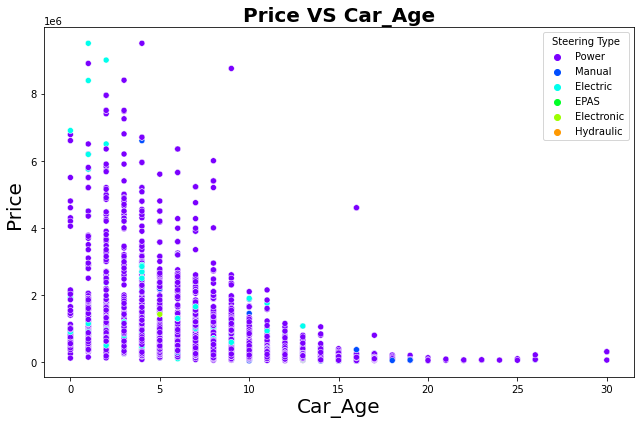

In [72]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Car_Age'], hue =df['Steering Type'])
plt.title("Price VS Car_Age",fontsize=20,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Here we got confirmation of prediction in previous section,**

***Almost all manual steering based car atleast 10 year old.***

### Exploring Steering Type

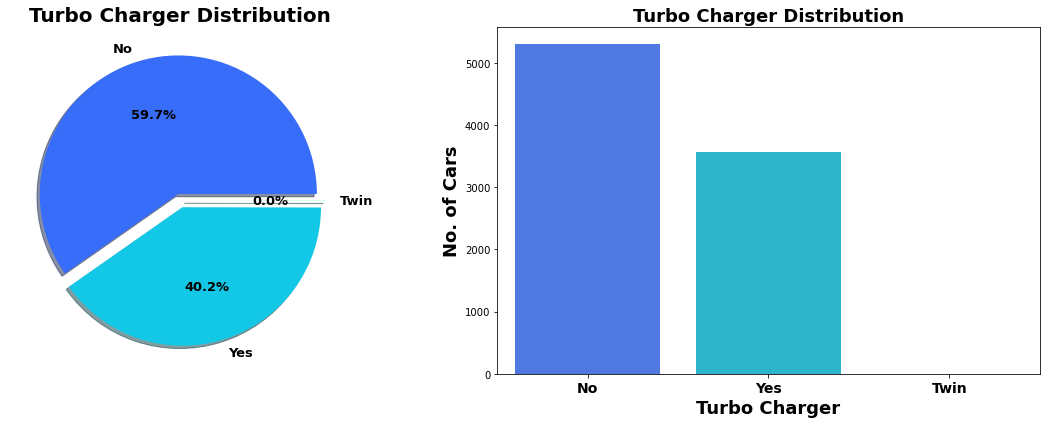

In [74]:
# Exploring Steering Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Turbo Charger'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Turbo Charger Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Turbo Charger',data=df,ax=ax[1])
ax[1].set_title('Turbo Charger Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Turbo Charger",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

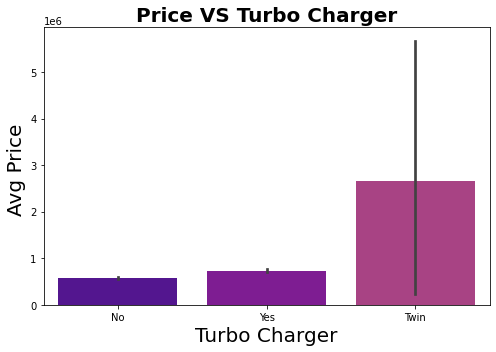

In [75]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
plt.figure(figsize =(7,5))
sns.barplot(y=df['Price (Rs.)'],x=df['Turbo Charger'])
plt.title("Price VS Turbo Charger",fontsize=20,fontweight ='bold')
plt.xlabel('Turbo Charger',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **40% cars are with turbo charger & almost less than 1 % car with twin facility.**
- **As expected Max price for car based on Twin engine followed by with turbocharger.**

### Exploring Transmission

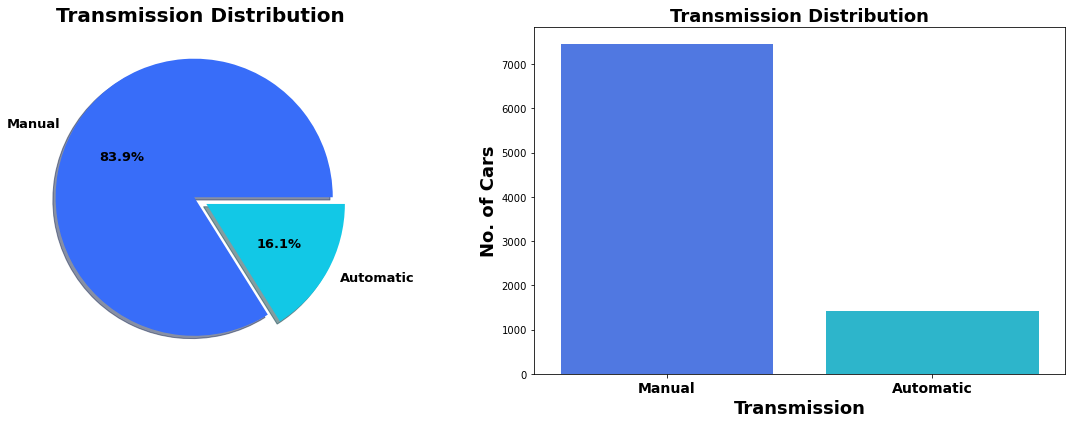

In [237]:
# Exploring Transmission
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Transmission'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Transmission Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Transmission',data=df,ax=ax[1])
ax[1].set_title('Transmission Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Transmission",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

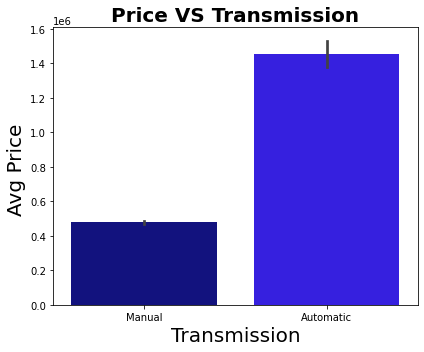

In [76]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(6,5))
sns.barplot(y=df['Price (Rs.)'],x=df['Transmission'])
plt.title("Price VS Transmission",fontsize=20,fontweight ='bold')
plt.xlabel('Transmission',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of car are with mannual transmission.**
- **The price of Automatic transmission is much greater than manual transmission.**

### Exploring Price Vs No of Cylinder

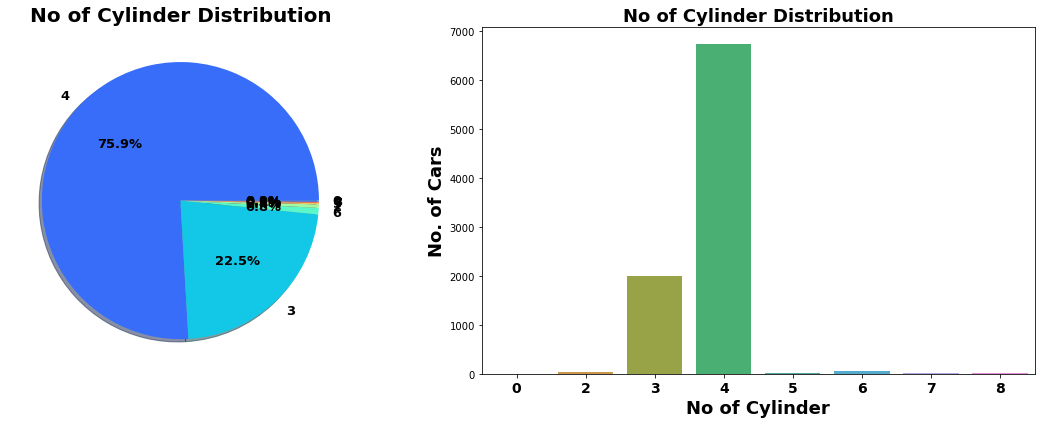

In [78]:
# Exploring Transmission
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['No of Cylinder'].value_counts().plot.pie(autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No of Cylinder Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('No of Cylinder',data=df,ax=ax[1])
ax[1].set_title('No of Cylinder Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("No of Cylinder",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

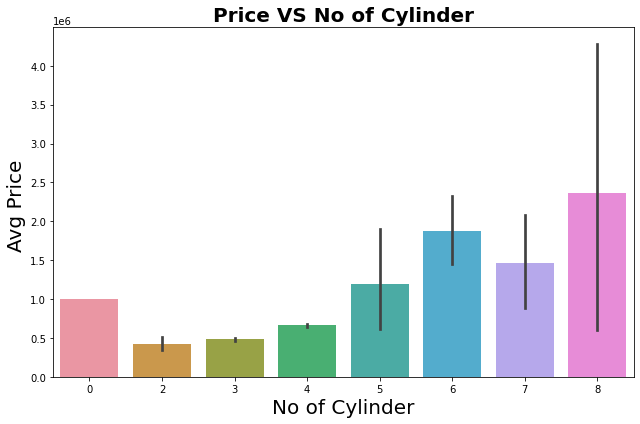

In [77]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(9,6))
sns.barplot(y=df['Price (Rs.)'],x=df['No of Cylinder'])
plt.title("Price VS No of Cylinder",fontsize=20,fontweight ='bold')
plt.xlabel('No of Cylinder',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

### Comment :
- **Most of Cars with are 4 cylinder engines followed by 3 cylinder engines.**
- **In terms of Avg Price as number of cylinder increases the avgerage price increases.**

### Car Age Vs Avgerage Price

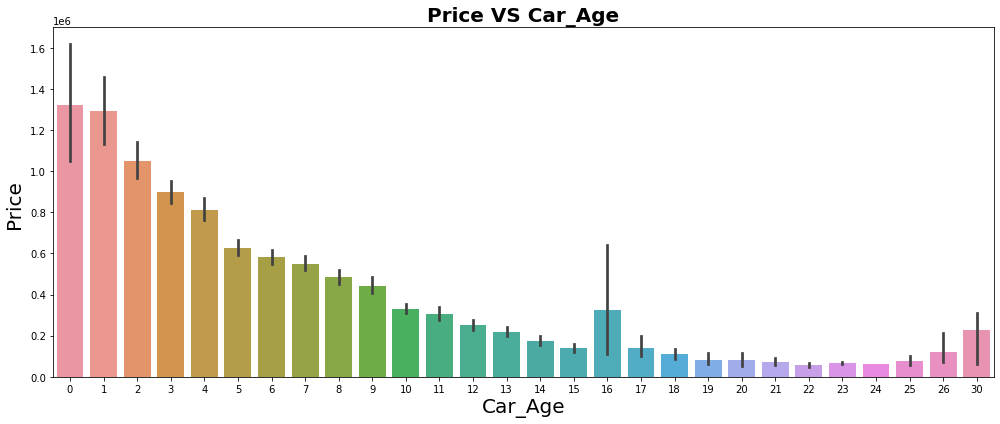

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
plt.figure(figsize =(14,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Car_Age'])
plt.title("Price VS Car_Age",fontsize=20,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

### Comment :
**As car get older, price of car depricates.**

### Exploration of brakes vs price

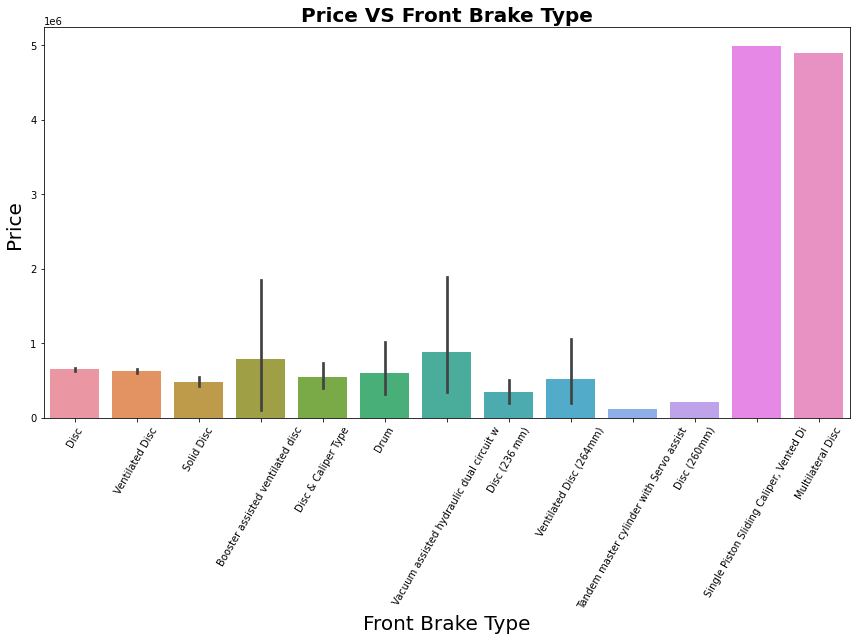

In [83]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10_r')
plt.figure(figsize =(12,9))
sns.barplot(y=df['Price (Rs.)'],x=df['Front Brake Type'])
plt.title("Price VS Front Brake Type",fontsize=20,fontweight ='bold')
plt.xlabel('Front Brake Type',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

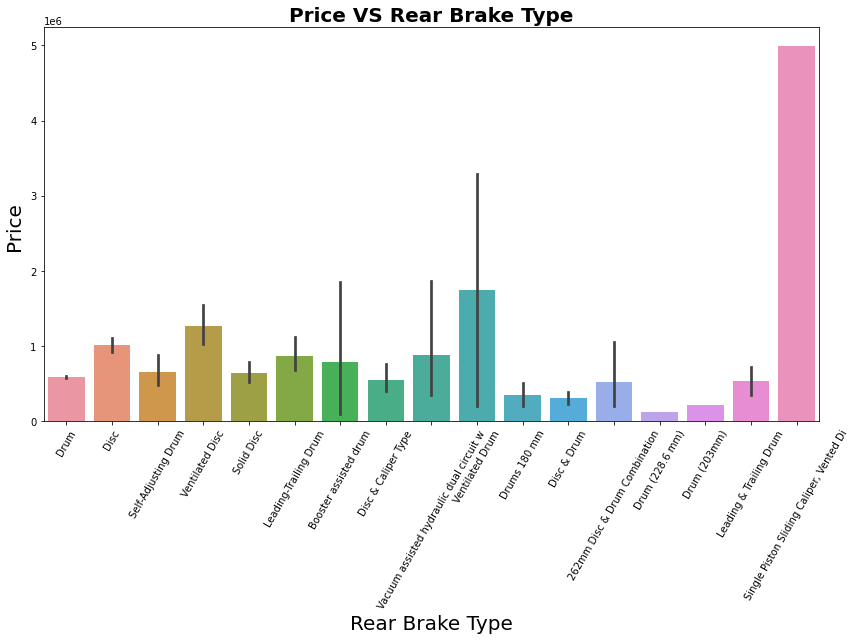

In [82]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=df['Price (Rs.)'],x=df['Rear Brake Type'])
plt.title("Price VS Rear Brake Type",fontsize=20,fontweight ='bold')
plt.xlabel('Rear Brake Type',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

### Price VS Milage

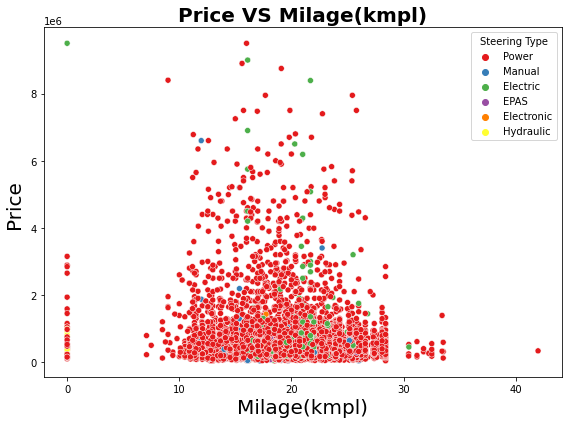

In [65]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(8,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Milage(kmpl)'],hue =df['Steering Type'])
plt.title("Price VS Milage(kmpl)",fontsize=20,fontweight ='bold')
plt.xlabel('Milage(kmpl)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Milage (kmpl) varies in between 10 to 25 kmpl for most of cars.**
**For Majority cars price is below 0.5e6.**
**We didn't get any other significant relation between price and steering types.**

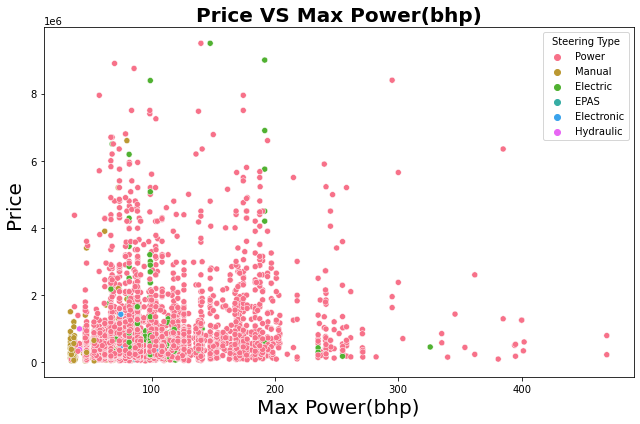

In [60]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Max Power(bhp)'], hue =df['Steering Type'])
plt.title("Price VS Max Power(bhp)",fontsize=20,fontweight ='bold')
plt.xlabel('Max Power(bhp)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

**Majority of cars have max power below 200 bhp.**

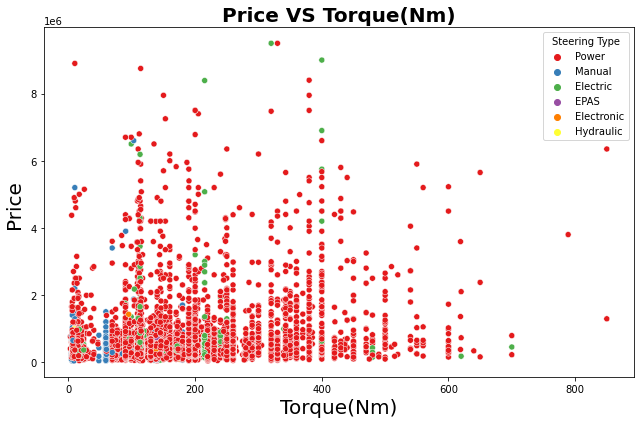

In [67]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Torque(Nm)'], hue =df['Steering Type'])
plt.title("Price VS Torque(Nm)",fontsize=20,fontweight ='bold')
plt.xlabel('Torque(Nm)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

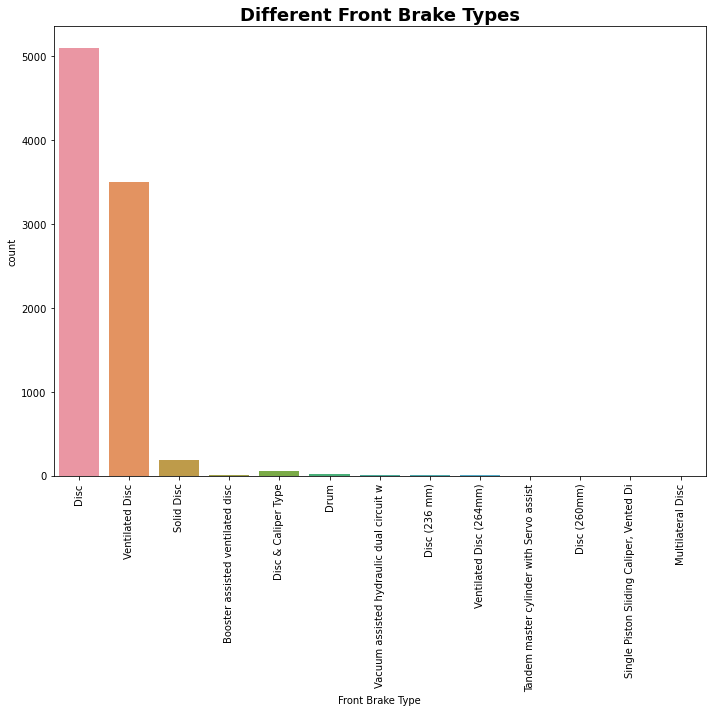

In [241]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,10])
sns.countplot(df['Front Brake Type'])
plt.title('Different Front Brake Types',fontsize=18,fontweight ='bold')
plt.xticks(rotation=90 );

**Most of car used Disc brakes of various different types.**

# Feature Engineering

## 1. Encoding Categorical Data 

In [186]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['KMs driven', 'Engine Displacement(CC)', 'Car_Age','Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)',
             'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)' ]

Categorical = ['Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 
               'Rear Brake Type', 'Tyre Volume', 'Turbo Charger', 'Super Charger']

In [187]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
0,4,18600,1497,1,17.40,117.3,145.0,5,185,2,5,1,5,3,i VTEC Engine,4,0,0,4440.0,1695.0,1495,675000.0,7,Honda City,i VTEC SV
1,1,15000,1956,1,17.10,170.0,350.0,5,185,4,5,1,2,3,2.0-Litre 4-Cyl Multijet,4,2,0,4395.0,1818.0,1640,1750000.0,4,Jeep Compass,2.0 Limited Option
2,1,115000,2499,1,14.80,80.0,19.0,7,185,2,4,11,5,3,In-Line Engine,4,2,0,4435.0,1680.0,1765,175000.0,13,Chevrolet Tavera,B2-7 seats BSIII
3,4,80000,1497,1,16.80,116.4,146.0,5,185,2,5,1,5,3,SOHC i-VTEC,4,0,0,4440.0,1695.0,1485,350000.0,13,Honda City,S
4,4,35000,1197,1,20.36,78.9,111.8,5,185,2,5,11,5,3,DOHC Kappa2 Engine,4,0,0,3585.0,1595.0,1550,300000.0,9,Hyundai i10,Sportz Option


In [189]:
df['Engine Type'] = le.fit_transform(df['Engine Type'])

In [192]:
df['Car_Brand'] = le.fit_transform(df['Car_Brand'])
df['Car_Model'] = le.fit_transform(df['Car_Model'])

In [194]:
df.head()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
0,4,18600,1497,1,17.40,117.3,145.0,5,185,2,5,1,5,3,307,4,0,0,4440.0,1695.0,1495,675000.0,7,59,1696
1,1,15000,1956,1,17.10,170.0,350.0,5,185,4,5,1,2,3,68,4,2,0,4395.0,1818.0,1640,1750000.0,4,87,355
2,1,115000,2499,1,14.80,80.0,19.0,7,185,2,4,11,5,3,169,4,2,0,4435.0,1680.0,1765,175000.0,13,29,712
3,4,80000,1497,1,16.80,116.4,146.0,5,185,2,5,1,5,3,234,4,0,0,4440.0,1695.0,1485,350000.0,13,59,1326
4,4,35000,1197,1,20.36,78.9,111.8,5,185,2,5,11,5,3,130,4,0,0,3585.0,1595.0,1550,300000.0,9,78,1437


In [193]:
df.shape

(8884, 25)

## 2. Outliers Detection & Removal 

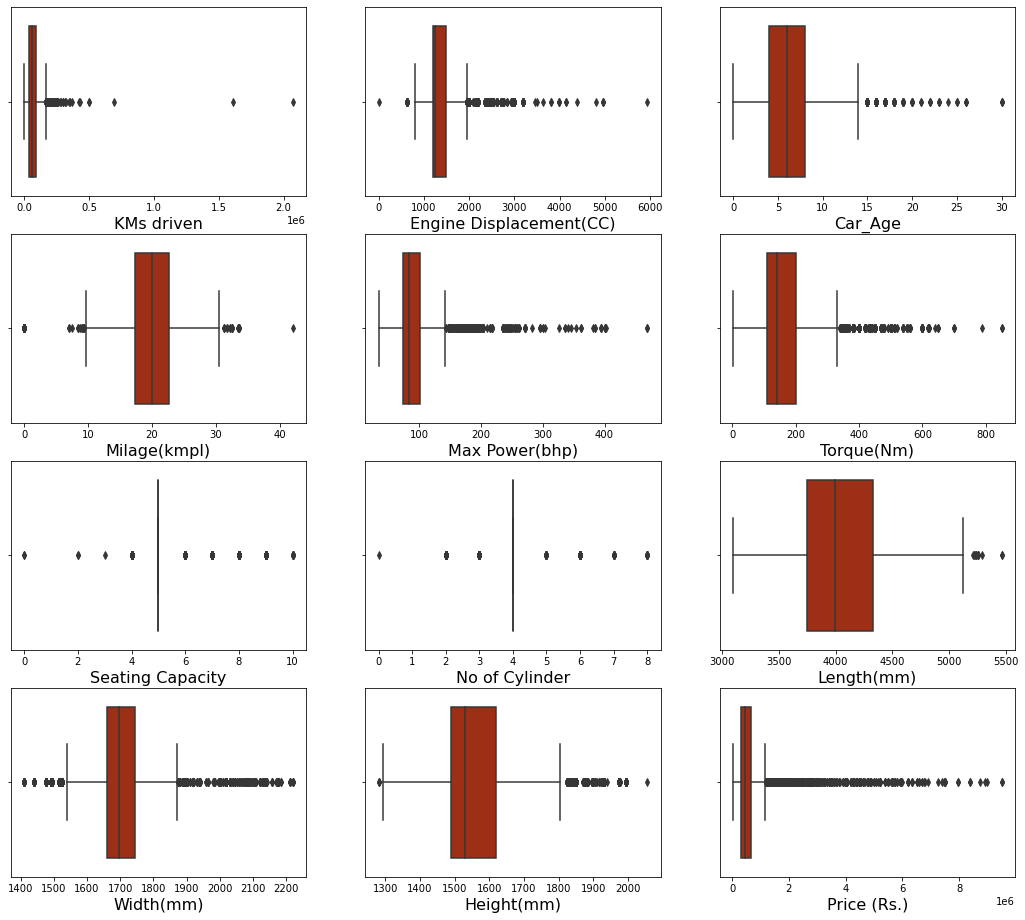

In [10]:
plt.figure(figsize=(18,16), facecolor ='white')
plt_num = 1
for i in Numerical:
    if plt_num <= 12:
        ax = plt.subplot(4,3,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

**From Boxplot we can see presense of outliers.**

**Since Data is realstic and data is error-free, we will build model with data we already have without removing outliers. Outliers are realstic data.**

## 3. Correlation

In [195]:
df.corr()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
Fuel Type,1.000000,-0.096669,-0.103263,0.036299,-0.119378,-0.255754,-0.570999,-0.257936,-0.088287,-0.130240,-0.127099,-0.053774,-0.000013,-0.054525,0.015317,-0.049173,-0.705556,-0.021321,-0.384157,-0.391022,-0.275566,-0.079260,-0.026821,-0.013892,0.067776
KMs driven,-0.096669,1.000000,0.077127,0.089567,-0.044611,0.009638,0.025004,0.050685,0.059157,-0.011959,0.048709,0.035885,0.022178,0.035672,0.008317,0.029526,0.044174,0.007300,0.029410,0.003664,0.022279,-0.165029,0.421579,0.073370,-0.099206
Engine Displacement(CC),-0.103263,0.077127,1.000000,-0.197157,-0.125241,0.169724,0.153158,0.071639,0.007224,0.093947,0.030277,-0.009279,0.019866,0.050597,0.001771,0.453062,0.107254,0.012034,0.128330,0.105600,0.054442,0.310738,0.054418,-0.009376,-0.095602
Transmission,0.036299,0.089567,-0.197157,1.000000,0.121133,-0.231979,-0.178822,-0.000538,0.063239,-0.206584,0.002166,0.011637,-0.028710,-0.041162,-0.002874,-0.094681,-0.078553,-0.008924,-0.115205,-0.129999,-0.016392,-0.462612,0.120936,0.039043,0.050768
Milage(kmpl),-0.119378,-0.044611,-0.125241,0.121133,1.000000,-0.479573,-0.218453,-0.370555,-0.014775,-0.230308,-0.037738,0.045736,-0.088282,-0.110698,-0.069008,-0.069725,0.047614,-0.047316,-0.374392,-0.281511,-0.276793,-0.114927,-0.077048,0.010856,0.089835
Max Power(bhp),-0.255754,0.009638,0.169724,-0.231979,-0.479573,1.000000,0.788804,0.186852,-0.081254,0.579099,0.040120,-0.050114,0.070916,0.052936,0.080080,0.109990,0.360693,0.039714,0.678239,0.654269,0.199255,0.215779,0.006523,-0.035675,-0.062735
Torque(Nm),-0.570999,0.025004,0.153158,-0.178822,-0.218453,0.788804,1.000000,0.234504,-0.012004,0.479703,0.102817,-0.028931,0.042986,0.039759,0.040884,0.096793,0.600632,0.001819,0.598572,0.634957,0.258921,0.194929,-0.000916,-0.027910,-0.055160
Seating Capacity,-0.257936,0.050685,0.071639,-0.000538,-0.370555,0.186852,0.234504,1.000000,0.075401,-0.028308,0.047572,-0.021823,0.035456,0.110958,0.035805,0.002230,0.246500,0.005102,0.292159,0.199129,0.568780,0.019204,0.029269,0.020888,-0.059448
Color,-0.088287,0.059157,0.007224,0.063239,-0.014775,-0.081254,-0.012004,0.075401,1.000000,-0.090973,0.029949,0.023632,-0.026815,-0.022146,0.012895,-0.032831,0.032220,-0.010854,-0.023168,-0.032637,0.064325,-0.042016,0.057440,-0.006745,-0.054478
Gear Box,-0.130240,-0.011959,0.093947,-0.206584,-0.230308,0.579099,0.479703,-0.028308,-0.090973,1.000000,-0.017551,-0.093107,0.013621,0.035276,0.058273,0.053211,0.222784,0.047184,0.364497,0.433372,-0.009922,0.190263,-0.016274,-0.050029,-0.036349


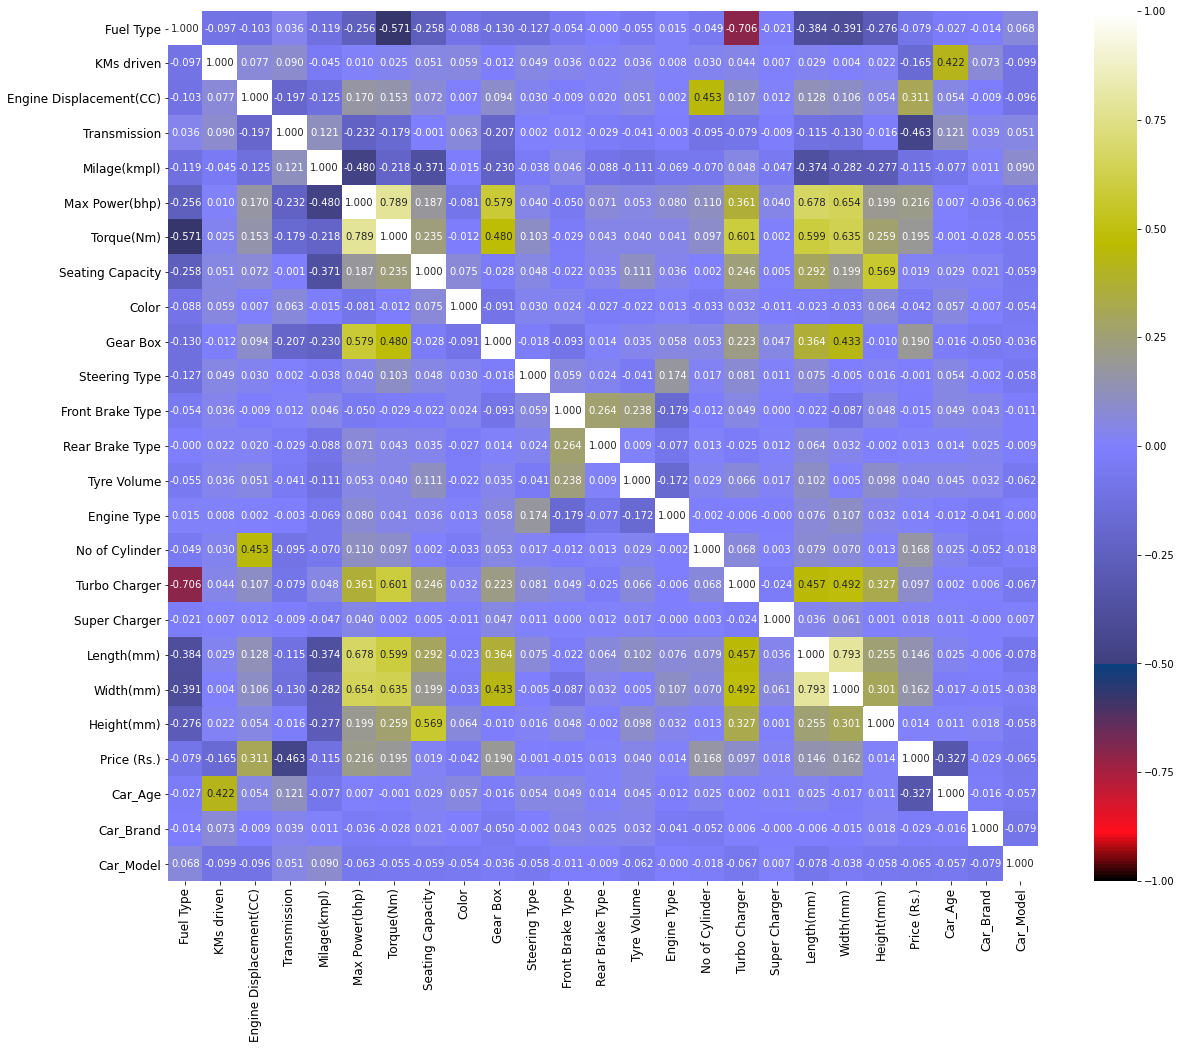

In [196]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

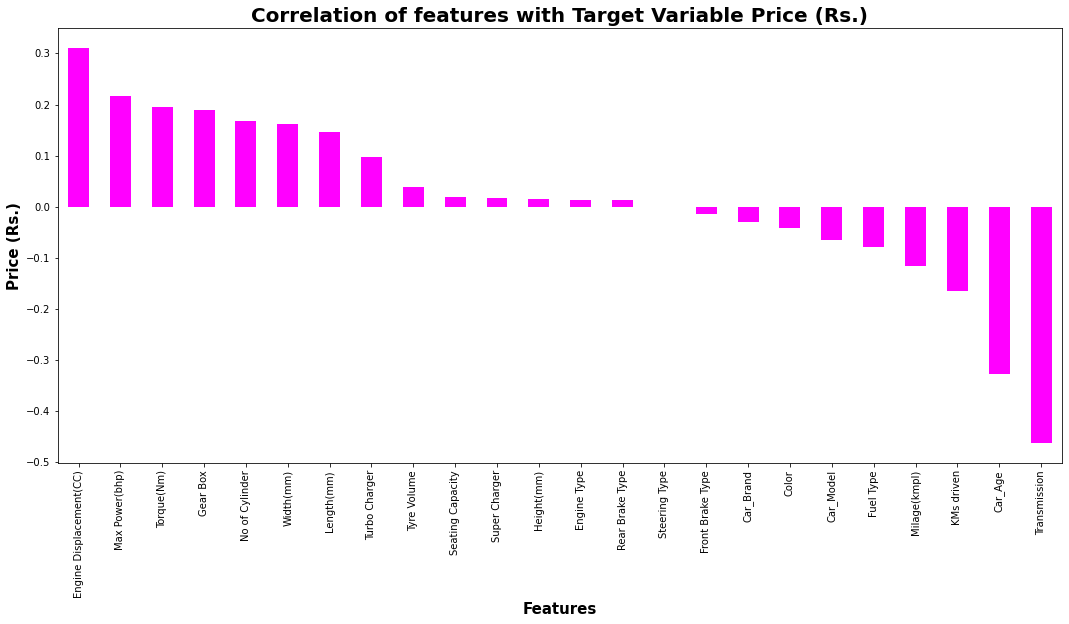

In [197]:
plt.figure(figsize = (18,8))
df.corr()['Price (Rs.)'].drop(['Price (Rs.)']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

#### Observation :
- **Maximum correlation observe in Length & Width followed by torque & max power.**
- **Most of features are moderately & poorly correlated with each other.** 
- **Steering type very very poorly correlated with each other.**

## 4. Checking Multicollinearity between features using variance_inflation_factor

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,2.595599,Fuel Type
1,1.254564,KMs driven
2,1.341150,Engine Displacement(CC)
3,1.130918,Transmission
4,1.917950,Milage(kmpl)
5,5.284063,Max Power(bhp)
6,4.834256,Torque(Nm)
7,1.782760,Seating Capacity
8,1.045537,Color
9,1.643369,Gear Box


**We can see that no multicollinearity exist between features.**

In [209]:
### Importing Final data final for ML learning after Feature Engineering
df.to_excel('Final ML Data.xlsx', index = False)